In [1]:
from NNReluSigmoid import NNReluSigmoid as NN
from testcases.testCases_v4 import *

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
network = NN()
train_original_x, train_original_y, *test_data = network.loadData("./datasets/train_catvnoncat.h5")

In [3]:
network.exploreData()

Number of training examples: 209
Number of testing examples: None
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: None
test_y shape: None


In [4]:
network.flattenData()

In [5]:
network.normalizeData()

In [6]:
network.setLayers([12288, 20, 7, 5, 1])

In [7]:
network.setDefaultActivation()

Cost after 0 iterations : 0.7717493284237686
Cost after 100 iterations : 0.6726650835700182
Cost after 200 iterations : 0.6495765256183719
Cost after 300 iterations : 0.610020120418779
Cost after 400 iterations : 0.5542517101685568
Cost after 500 iterations : 0.507791140604111
Cost after 600 iterations : 0.4483866907780338
Cost after 700 iterations : 0.39004911191246755
Cost after 800 iterations : 0.35211734011698786
Cost after 900 iterations : 0.30210728044974183
Cost after 1000 iterations : 0.2544084822816684
Cost after 1100 iterations : 0.21512146498116275
Cost after 1200 iterations : 0.19418205352556453
Cost after 1300 iterations : 0.17033217583701515
Cost after 1400 iterations : 0.1527209464922781
Cost after 1500 iterations : 0.1371274112910016
Cost after 1600 iterations : 0.12535111778879857
Cost after 1700 iterations : 0.11526236208259444
Cost after 1800 iterations : 0.10579820578608314
Cost after 1900 iterations : 0.09846031767281013
Cost after 2000 iterations : 0.0943067788164

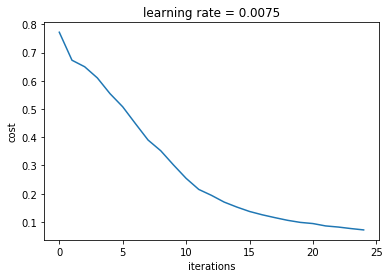

{'W1': array([[ 1.79814000e-02, -5.58299146e-03, -2.43497952e-03, ...,
         -9.72655804e-03, -9.09123477e-03,  8.50567442e-03],
        [ 1.26161529e-02,  1.22291936e-03, -8.32039309e-03, ...,
          1.25933313e-02,  3.94210222e-04,  8.76722764e-03],
        [ 2.11394623e-04, -6.27912273e-04,  1.02057260e-02, ...,
          1.18071363e-03, -7.35782963e-03, -6.32409416e-03],
        ...,
        [ 1.40830136e-03, -1.37697164e-03,  1.63992605e-02, ...,
         -8.46448721e-03, -7.61579753e-03, -1.49157278e-03],
        [-1.16936019e-03, -5.27081187e-03, -9.57508423e-03, ...,
          1.95841999e-02, -5.25351382e-03,  5.15200653e-05],
        [-1.68693001e-02, -6.83206857e-03,  8.00105545e-03, ...,
          1.58503735e-02,  1.27872853e-02, -3.04616891e-03]]),
 'b1': array([[ 0.00027448],
        [ 0.01080933],
        [ 0.00765562],
        [ 0.00082742],
        [ 0.00518625],
        [ 0.0013693 ],
        [-0.00116134],
        [ 0.00296044],
        [ 0.00481465],
        [ 

In [8]:
network.startTraining(network.trainX, network.trainY, numIterations=2500, printCost=True)

## 7 - TESTS


In [ ]:
parameters = network.initializeParams([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

In [ ]:
A, W, b = linear_forward_test_case()
Z = network.forwardLinear(A, W, b)
print("Z = " + str(Z))

In [ ]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = network.forwardPropagation(X, parameters, activations=[(2,"relu"), (3, "sigmoid")])
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

In [ ]:
Y, AL = compute_cost_test_case()
print(np.divide((np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T)), -3))
print("cost = " + str(network.calculateCost(AL, Y)))

In [ ]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()
A,W,b = linear_cache
cache = (A, A, A, W, b)
dA_prev, dW, db = network.backwardActivation(dZ, cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

In [ ]:
dAL, linear_activation_cache = linear_activation_backward_test_case()
lin, act = linear_activation_cache
# (lin, act) = cache
A, W, b = lin
Z = act
network.backwardLinear(dAL, Z, "sigmoid")
network.backwardLinear(dAL, Z, "relu")



In [ ]:
AL, Y_assess, caches = L_model_backward_test_case()
cache1, cache2 = caches
((A1, W1, b1), Z1) = cache1
((A2, W2, b2), Z2) = cache2

A_prev, A, Z, W, b = cache
cache1 = (A1, A1, Z1, W1, b1)
cache2 = (A2, A2, Z2, W2, b2)
caches = [cache1, cache2]
# caches[0]

grads = network.backwardPropagation(AL, Y_assess, caches, activations=[(1,"relu"), (2, "sigmoid")])
print_grads(grads)

In [ ]:
parameters, grads = update_parameters_test_case()
parameters = network.updateParams(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

In [ ]:
print(None!=None and [])

In [ ]:
a = [1,2,3,0,4]
a[-1<=0]

In [ ]:
b = 5
for i in range(1,b):
    print(i)
    
for i in range(b):
    print(i+1)